# Pequeño Experimento de Audio: Mel-Spectrograms

*   List item
*   List item



In [32]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML"

'00 - Introducción al aprendizaje de máquina'
'01 - Fundamentos matemáticos'
'02 - Introducción a la programación en python'
'03 - Análisis y visualización de datos'
'04 - Modelos clásicos de machine learning: teoría e implementación'
'05 - Introducción a modelos avanzados'
'06 - Proyectos'
 README.md
 Recursos


In [34]:
!ls "/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos"

 c_mayor.wav	      Loading_Audio_and_Visualization.ipynb
'Cover Letter.gdoc'   Notebook_Bandas_Mel_Mel_Spectrogram.ipynb
 IRMAS-Sample	      Visualizacion_de_Datos_Clase_01.pptx


In [35]:
%cd "/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos"

/content/drive/MyDrive/Uchile_Sonido/ML/03 - Análisis y visualización de datos


### Cargamos los audios

In [36]:
import os
import typing
from typing import List, Tuple, Dict
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

Experimento Psicoacústico

In [37]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable

# Ejemplo 1 
f1 = 65
f2 = 262

# Ejemplo 2
f3 = 1568
f4 = 1760

c1 = 0.5*np.sin(2*np.pi*f1*t)                
c4  = 0.5*np.sin(2*np.pi*f2*t)     
g6 = 0.5*np.sin(2*np.pi*f3*t)     
a6= 0.5*np.sin(2*np.pi*f4*t)     


In [38]:
x1 = np.hstack((c1,c4))
x2 = np.hstack((g6,a6))

In [39]:
x1.shape

(88200,)

La diferencia en frecuencia son 200 Hz en ambos casos pero perceptualmente sentirmos diferente la diferencia entre estos saltos por estar en diferentes bandas: nuestra resolución en frecuencias no es lineal!

In [40]:
ipd.Audio(x1, rate=sr) # load a NumPy array

In [41]:
ipd.Audio(x2, rate=sr) 

## Escala Mel: percepción no lineal de la frecuencia

$m = 2595 \cdot \text{log}\left(1 + \dfrac{f}{500}\right)$


$f = 700 \cdot \left(10 + \dfrac{f}{500}\right)$

In [42]:
f = np.linspace(0,10000,10000)

In [43]:
m = 2595*np.log(1+ f/500)

Text(0.5, 1.0, 'Escala Mel')

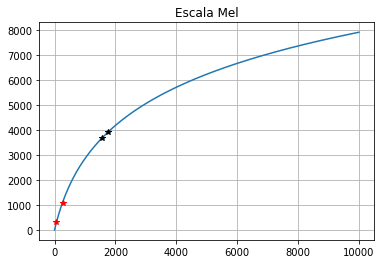

In [44]:
plt.plot(f,m)
plt.plot(f[64],m[64],'r*')
plt.plot(f[262],m[262],'r*')

plt.plot(f[1568],m[1568],'k*')
plt.plot(f[1760],m[1760],'k*')

plt.grid()
plt.title("Escala Mel")

Testeando Mel-Filter Bank

In [47]:
y, sr = librosa.load('c_mayor.wav',sr=22050)

In [48]:
ipd.Audio('c_mayor.wav',rate=22050) 

In [49]:
filter_banks = librosa.filters.mel(n_fft = 2048, sr = 22050, n_mels = 10)

In [57]:
filter_banks.shape #(numero de filtros, frecuencia de nyquist)

(10, 1025)

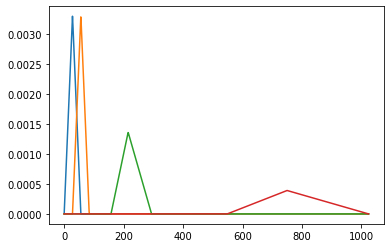

In [56]:
plt.plot(filter_banks[0])
plt.plot(filter_banks[1])
plt.plot(filter_banks[5])
plt.plot(filter_banks[9])

In [53]:
len(filter_banks)

10

In [65]:
mel_spectrogram = librosa.feature.melspectrogram(y,sr=sr,n_fft = 2048, hop_length = 512, n_mels = 10)

In [66]:
mel_spectrogram.shape

(10, 259)

In [67]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

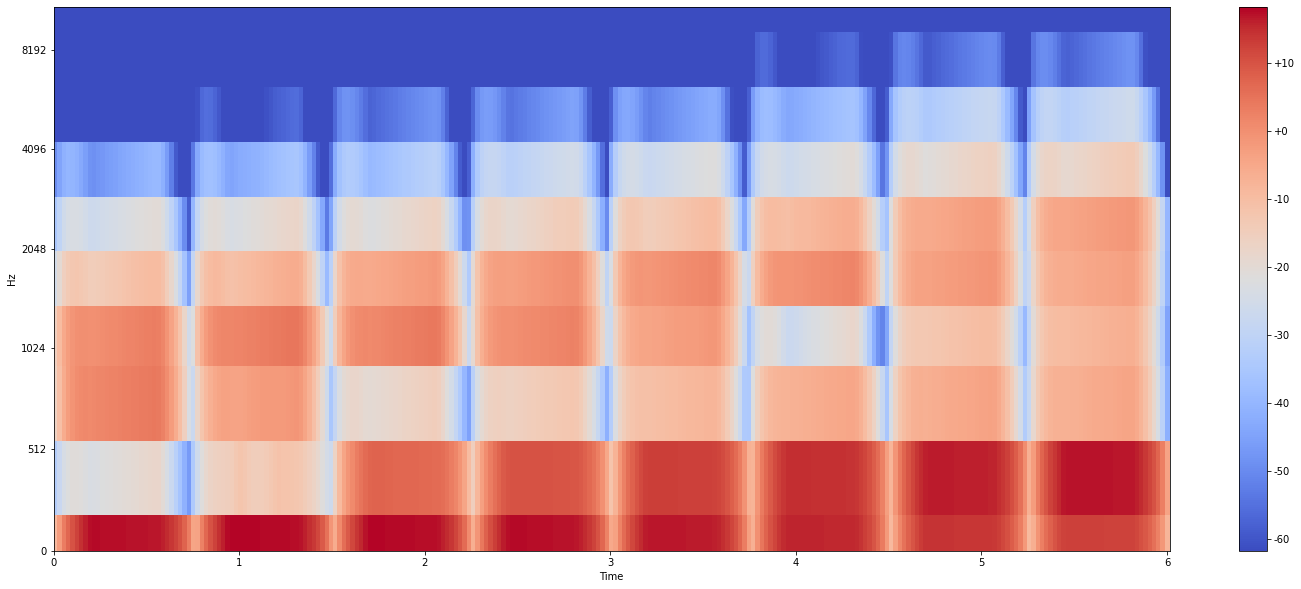

In [68]:
plt.figure(figsize = (25,10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis = "time",
                         y_axis="mel",
                         sr = sr)
plt.colorbar(format="%+2.f")
plt.show()